<a href="https://colab.research.google.com/github/NguyenMinhThangNMT/HomeWorks/blob/main/Conlacnguoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


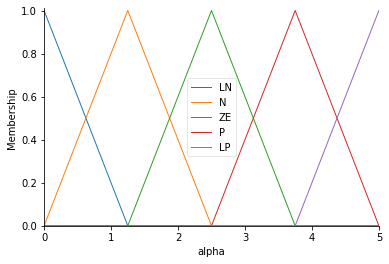

In [53]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
universe1 = np.linspace(0,5,25)
universe = np.linspace(0,5,25)
alpha= ctrl.Antecedent(universe,'alpha')
dalpha= ctrl.Antecedent(universe,'dalpha')
F=ctrl.Consequent(universe1,'F')
names=['LN','N','ZE','P','LP']

alpha.automf(names=names)

alpha.view()


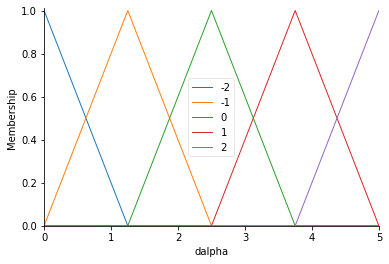

In [54]:
name=['-2','-1','0','1','2']
dalpha.automf(names=name)
dalpha.view()

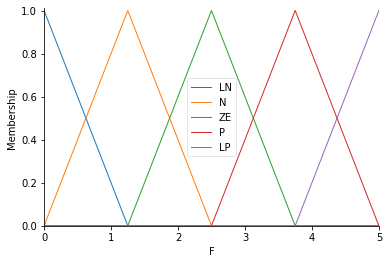

In [55]:
name1=['LN','N','ZE','P','LP']
F.automf(names=name1)
F.view()

In [56]:
rule0=ctrl.Rule(antecedent=((alpha['LN'] & dalpha['-2'])|(alpha['LN'] & dalpha['-1'])|(alpha['N'] & dalpha['-2'])),consequent=F['LN'],label='F LN')
rule1=ctrl.Rule(antecedent=((alpha['N'] & dalpha['-1'])|(alpha['LN'] & dalpha['0'])|(alpha['N'] & dalpha['0'])|(alpha['ZE'] & dalpha['-1'])|(alpha['ZE'] & dalpha['-2'])|(alpha['P'] & dalpha['-2'])),consequent=F['N'],label='F N')
rule2=ctrl.Rule(antecedent=((alpha['LN'] & dalpha['2'])|(alpha['N'] & dalpha['1'])|(alpha['ZE'] & dalpha['0'])|(alpha['P'] & dalpha['-1'])|(alpha['LP'] & dalpha['-2'])),consequent=F['ZE'],label='F ZE')
rule3=ctrl.Rule(antecedent=((alpha['N'] & dalpha['2'])|(alpha['ZE'] & dalpha['1'])|(alpha['ZE'] & dalpha['2'])|(alpha['P'] & dalpha['1'])|(alpha['P'] & dalpha['0'])|(alpha['LP'] & dalpha['-1'])|(alpha['LP'] & dalpha['0'])),consequent=F['P'],label='F P')
rule4=ctrl.Rule(antecedent=((alpha['P'] & dalpha['2'])|(alpha['LP'] & dalpha['1'])|(alpha['LP'] & dalpha['2'])),consequent=F['LP'],label='F LP')


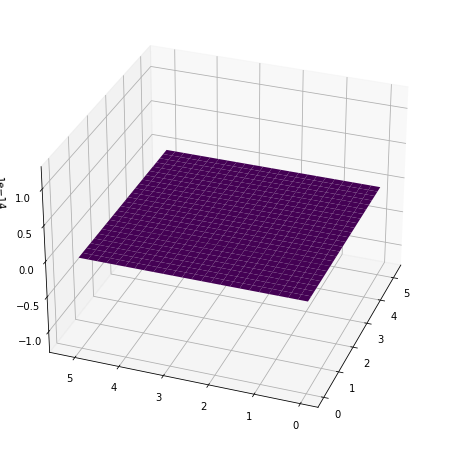

In [62]:
from matplotlib import figure
from mpl_toolkits.mplot3d.axes3d import Axes3D as ax
import matplotlib.pyplot as plt

system = ctrl.ControlSystem([rule0,rule1,rule2,rule3,rule4])  
sim=ctrl.ControlSystemSimulation(system,flush_after_run=25*25+1)
upsampled=np.linspace(0,5,25)
x,y=np.meshgrid(upsampled,upsampled)
z=np.zeros_like(x)
for i in range(15):
  for j in range(15):
     sim.input['alpha']=x[i,j]
     sim.input['dalpha']=y[i,j]
     sim.compute()
     sim.output['F']=z[i,j]
fig = plt.figure(figsize=(8,8)) 
ax=fig.add_subplot(111, projection='3d')
suf=ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
cset=ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',alpha=0.5)
cset=ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',alpha=0.5)
cset=ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',alpha=0.5)
ax.view_init(30,200)
